### Plik 2 - Uczenie maszynowe

In [1]:
# Na początku jeszcze wykres z seaborn, który w pliku z lab_5 był jako komentarz, pokazujący korelację, potem już modelowanie
# Ogólnie w modelu usuwa się zm. mocno skorelowane lub te, które nie mają sensu w przypadku wyjaśnialności modelu
# Ponadto też by uzyskać dobry model (mieć pewność), wykonuje się kroswalidację krzyżową, i wtedy losujemy z całego zbioru
# ileś podzbiorów, i n-1 z nich wrzuca się do zbioru treningowe, a 1 jest zbiorem testowym i robi się permutację, czyli
# przesuwamy te zbiory o z, i mamy w ten sposób dodatkowe (n-1) modeli, które mają różnego rodzaju wartości błędu, na tej 
# podstawie wynik co otryzmamy na końcu uśredniamy i jest on najbardziej wiarygodny.

#ładowanie pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
wine = pd.read_csv("winequality-all.csv", comment="#")
wine.color = wine.color.astype("category")
print(wine.columns.str.cat(sep=", "))
wine.iloc[:, 0:11].describe().round(1).T.iloc[:, 1:]
wine.color.value_counts()
white_wine = wine[wine.color == "white"]
white_wine = white_wine.iloc[:, 0:11]
white_wine.head()
y = white_wine.iloc[:, -1]
y.head()
X = white_wine.iloc[:, :-1]
X.head()
corr_P = white_wine.corr("pearson")
corr_P.shape
corr_P
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri
corr_P_tri[abs(corr_P_tri)>0.5]

fixed.acidity, volatile.acidity, citric.acid, residual.sugar, chlorides, free.sulfur.dioxide, total.sulfur.dioxide, density, pH, sulphates, alcohol, response, color


density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

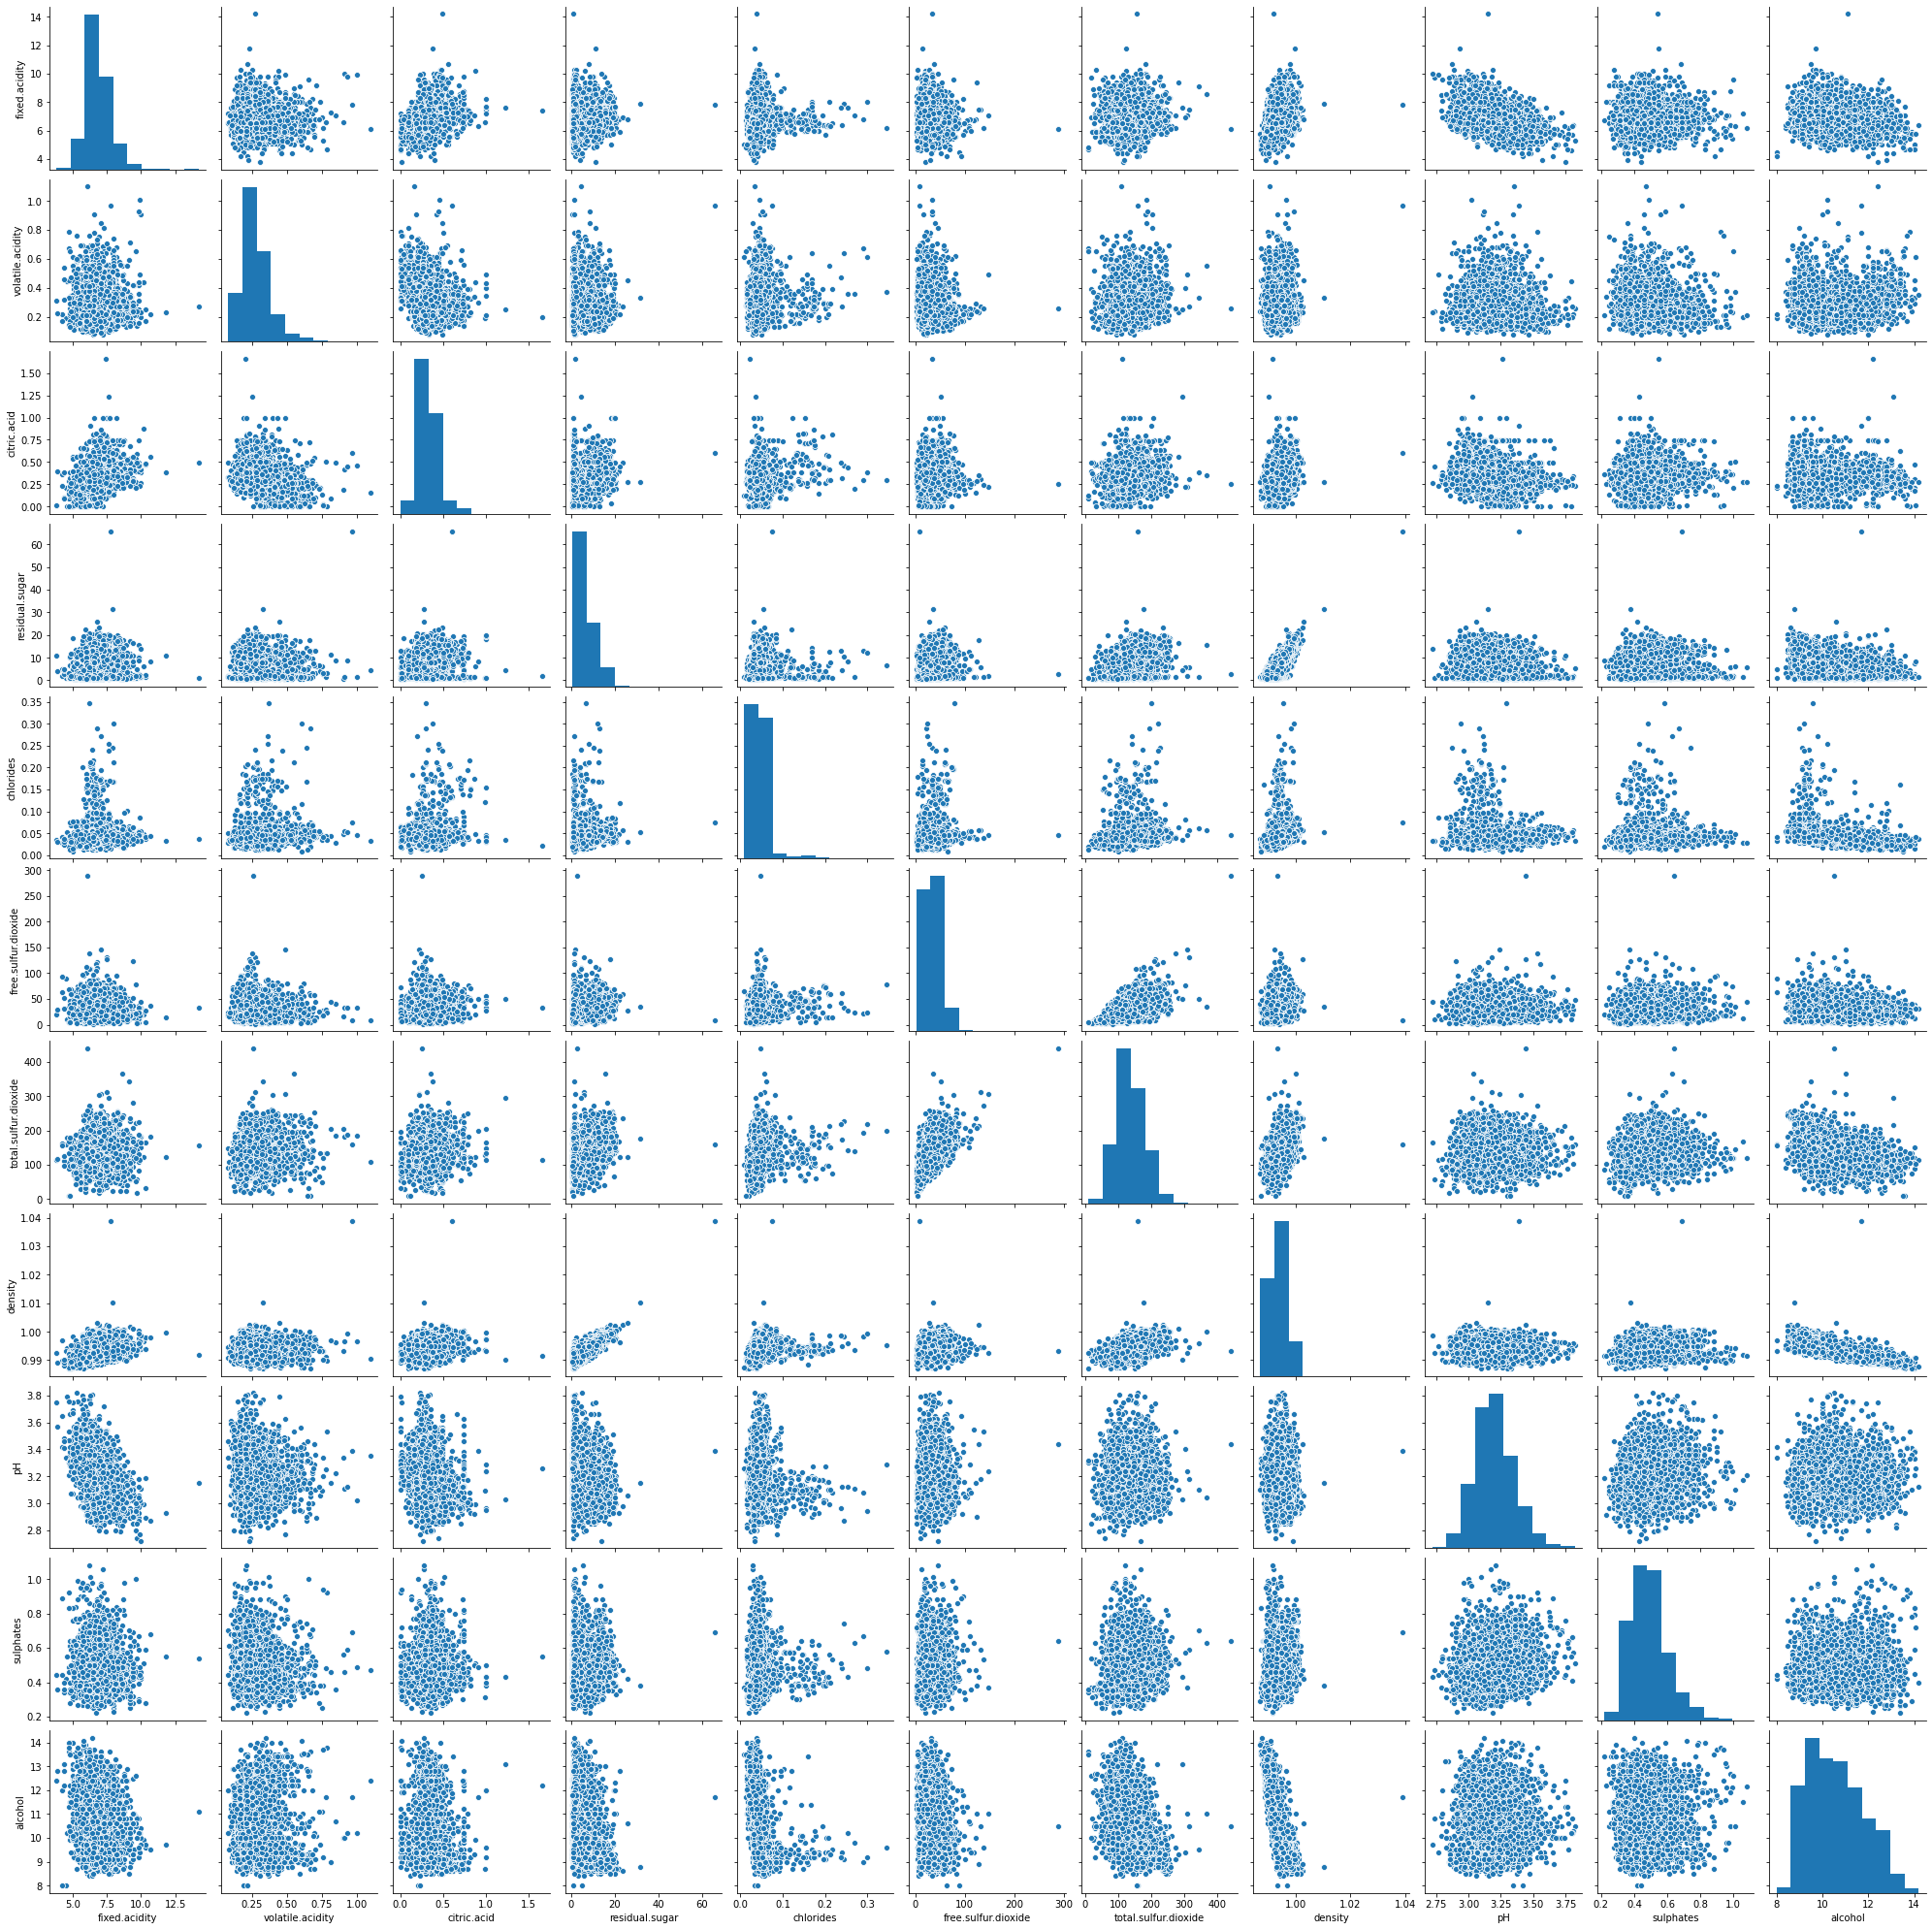

In [3]:
# Teraz ta wizualizacja !!!
#wizualizacja korelacji przy pomocy seaborn pairplot
sns.pairplot(white_wine)
plt.show() # widać m. in. na tym wykresie zal. liniową między density a residual.sugar, podobnie alcohol i density, 
# większość zmiennych nie wykazuje zbytnio korelacji

In [4]:
# To jest po to, gdyż kontynuujemy ten plik 2, więc skopiowałem  potrzebny kod z lab_5
corr_S = white_wine.corr("spearman")
corr_S.shape
corr_S
corr_S_tri = corr_S.where(np.triu(np.ones(corr_S.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_S_tri
corr_S_tri[abs(corr_S_tri)>0.5]
corr_P_tri[abs(corr_P_tri)>0.5]
import sklearn.linear_model
mnk = sklearn.linear_model.LinearRegression()
mnk
mnk.fit(X,y)
mnk.intercept_
mnk.coef_
X.columns
x_nowy = X.mean().values.reshape(1,-1)
x_nowy
mnk.predict(x_nowy)

array([10.58935791])

In [5]:
# Uwaga: na tej stronie są w Python modele liniowe itp.: scikit.leanr.org/stable/supervised_learning.html#supervised-learning
# będziemu używać wielu modeli z tej strony i zobaczymy,jakie wynki tymi modelami będziemy dostawać

In [6]:
#dla zbioru wystandaryzowanego, współczynniki regresji nabierają przydatnej interpretacji
#tzn. im większa wartość modułu współczynnika, tym bardziej istotny ma on wpływ na wartość odpowiedzi
X_std = (X-X.mean(axis=0))/X.std(axis=0)
X_std.describe() # to jest tzw. standaryzacja Z

fixed.acidity  volatile.acidity   citric.acid  residual.sugar  \
count   3.961000e+03      3.961000e+03  3.961000e+03    3.961000e+03   
mean    1.935272e-14      8.087727e-16  3.636369e-14   -3.493236e-15   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -3.506157e+00     -1.938741e+00 -2.730444e+00   -1.093214e+00   
25%    -6.221838e-01     -6.819386e-01 -5.253923e-01   -8.875223e-01   
50%    -4.538926e-02     -1.985530e-01 -1.170494e-01   -2.498782e-01   
75%     5.314053e-01      4.781869e-01  4.546308e-01    6.140267e-01   
max     8.491171e+00      7.922325e+00  1.082654e+01    1.231788e+01   

          chlorides  free.sulfur.dioxide  total.sulfur.dioxide       density  \
count  3.961000e+03         3.961000e+03          3.961000e+03  3.961000e+03   
mean  -1.258625e-14         1.289888e-16         -3.190245e-16  2.000196e-12   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.597435e+00        -1.911048e+00         -2.972323e+00 -2.299642e+00   
25%   -4.720257e-01        -6.908283e-01         -7.232596e-01 -7.469302e-01   
50%   -1.690310e-01        -1.097715e-01         -9.723169e-02 -9.968011e-02   
75%    1.772487e-01         5.874967e-01          6.679136e-01  6.611831e-01   
max    1.298960e+01         1.476528e+01          7.020938e+00  1.555826e+01   

                 pH     sulphates  
count  3.961000e+03  3.961000e+03  
mean   3.677989e-14 -1.420183e-14  
std    1.000000e+00  1.000000e+00  
min   -3.137394e+00 -2.381468e+00  
25%   -6.958845e-01 -7.077954e-01  
50%   -1.020038e-01 -9.117923e-02  
75%    6.238505e-01  5.254370e-01  
max    4.121148e+00  5.194102e+00

In [7]:
# Uwaga: to jest proces odwracalny, czyli jak zbudujemy model na danych wystandaryzowanych, a potem byśmy 
# pomnożyli przez odch. std. i dodali średnią, to byśmy dostali zwykłe dane.

In [8]:
y_std = (y - y.mean())/y.std()

In [9]:
y_std.describe() # Mamy wystandaryzowaną zm. celu

count    3.961000e+03
mean    -3.194917e-14
std      1.000000e+00
min     -2.127523e+00
25%     -8.950613e-01
50%     -1.555843e-01
75%      6.660569e-01
max      2.966652e+00
Name: alcohol, dtype: float64

In [10]:
# Nauczymy model dla wystandaryzowanych danych:
mnk_std = sklearn.linear_model.LinearRegression()
mnk_std.fit(X_std, y_std)

LinearRegression()

In [11]:
# wyświetlamy współczynniki modelu
mnk_std.coef_

array([ 0.36252396,  0.07576131,  0.04194095,  0.96966857, -0.00748544,
       -0.04717757,  0.00991469, -1.64160477,  0.30234753,  0.09510745])

In [12]:
# Chcemy zobaczyć współczynniki modelu
pd.Series(np.abs(mnk_std.coef_), index=X.columns.to_list()).round(4).sort_values(ascending=False)

density                 1.6416
residual.sugar          0.9697
fixed.acidity           0.3625
pH                      0.3023
sulphates               0.0951
volatile.acidity        0.0758
free.sulfur.dioxide     0.0472
citric.acid             0.0419
total.sulfur.dioxide    0.0099
chlorides               0.0075
dtype: float64

In [13]:
# density wyszła najmocniejsza, więc chcemy ją wyciąć
# Pokażemy teraz, jak wygląda ocenianie modeli
#ocena jakości modelu
#porównanie wartości dopasowanych, obliczonych za pomocą modelu z wartościami oryginalnymi
y_pred = mnk.predict(X) # zobaczymy, jak wygląda predykcja dla całego zbioru
y_pred[0:8]

array([ 8.76177537,  9.46286638, 10.70447049,  9.96719912,  9.68406894,
       10.17792583, 11.86187488, 10.38714494])

In [14]:
y[0:8] # tak wyglądają normalne wartości

1359     8.8
1360     9.5
1361    10.1
1362     9.9
1363     9.6
1364    11.0
1365    12.0
1366     9.7
Name: alcohol, dtype: float64

In [15]:
# Zobaczymy, jakich metryk mozemy użyć do jakich modeli
# Uwaga, bardzo ważne: NIGDY NIE MOŻEMY BAZOWAĆ TYLKO NA 1 METRYCE (mierze błędu, bo to moze być zgubne, min. 3 użyć trzeba

#współczynnik determinacji R2 (f-cja score to robi)
mnk.score(X,y)
# Uwaga: im bliżej 1 ma R^2, tym lepsze jest dopasowanie modelu

0.8580656118411176

In [16]:
# Ale lepiej jest to używać, lepsza konstrukcja z sklearn
sklearn.metrics.r2_score(y, y_pred)

0.8580656118411176

In [17]:
#lub inne miary błędów dopasowania
#MSE - średni błą kwadratowy
sklearn.metrics.mean_squared_error(y, y_pred)

0.21019074651654168

In [18]:
#MAE - średni błąd cąłkowity
sklearn.metrics.mean_absolute_error(y, y_pred)

0.30140201967067975

In [19]:
#MedAE - błąd medianowy
sklearn.metrics.median_absolute_error(y, y_pred)

0.24887712240292714

In [20]:
# Możemy powiedzieć o tym modelu, że jest za wcześnie, by powiedzieć że błąd jest za duży lub za mały, 
# dopiero jak będziemy mieć jakiś punkt odniesienia, możemy to powiedzieć.
# Błąd możemy dobrze ocenić, jak już będziemy korzystać ze zbioru treningowego i testowego.

In [21]:
# Zaczynamy teraz budować prawdziwy model, w którym to będziemy dzielić cały zbiór na uczący i testowy 

#zależy nam na dobrych zdolnościach predykcyjnych modelu
#ale uważamy też żeby nie przeuczyć modelu, 
#zatem dzielimy zbiór na próbę uczącą (80%) i testową (20%)
X_ucz, X_test, y_ucz, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=12345)
# X_ucz - zbiór predyktorów w zb. uczącym, anal. X_test w zbiorze testowym, y- zawartość alkoholu w odp. zbiorze
# test_size=0.2 - robimy zbiór testowy, w którym jest 20% wszystkich danych, b. często tak się przyjmuje
print(X_ucz.shape)
print(X_test.shape)
print(y_ucz.shape)
print(y_test.shape)

(3168, 10)
(793, 10)
(3168,)
(793,)


In [22]:
#stworzymy funkcję, która dopasowuje model regresji liniowej do danej próby
#oraz oblicza miary błędów dopasowania
def fit_regression(model, X_ucz, X_test, y_ucz, y_test):
    model.fit(X_ucz, y_ucz)
    y_ucz_pred = model.predict(X_ucz)
    y_test_pred = model.predict(X_test)
    r2 = sklearn.metrics.r2_score
    mse = sklearn.metrics.mean_squared_error
    mae = sklearn.metrics.mean_absolute_error
    medae = sklearn.metrics.median_absolute_error
    return {
        "r_score_u": r2(y_ucz, y_ucz_pred),
        "r_score_t": r2(y_test, y_test_pred),
        "MSE_u": mse(y_ucz, y_ucz_pred),
        "MSE_t": mse(y_test, y_test_pred),
        "MAE_u": mae(y_ucz, y_ucz_pred),
        "MAE_t": mae(y_test, y_test_pred),
        "MEDAE_u": medae(y_ucz, y_ucz_pred),
        "MEDAE_t": medae(y_test, y_test_pred)
    }
# wyjaśnienie funkcji:
# I arg. to model (najpierw użyjemy model mnk), potem zb. uczące i testowe z predyktorami, wartości zm. celu w odp. zbiorze
# za pomocą fit uczymy model, robimy predykcję wyników dla zb. uczącego, czyli sprawdzam y z nasyzch danych, anal. dla zm. testowych
# potem definiujemy 4 metryki
# czyli w skrócie: uczenie modelu, predykcje, metryki, zwracamy metryki w postaci słownika

In [23]:
#przedstawiamy działanie powyższej funkcji oraz wyniki
model_names = ["Reg. liniowa"] # tworzymy zawsze etykietę dla naszej ramki danych
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz, X_test, y_ucz, y_test)]
df_results_errors = pd.DataFrame(res, index=model_names)

In [24]:
df_results_errors

r_score_u  r_score_t     MSE_u    MSE_t     MAE_u    MAE_t  \
Reg. liniowa   0.906772   0.621868  0.138808  0.54539  0.282308  0.30647   

               MEDAE_u   MEDAE_t  
Reg. liniowa  0.225979  0.229505

In [25]:
# Możemy po tych wynikach powiedzieć, czy (mając metryki obu zbiorów) nasz model jest stabilny, ten model jest PRZEUCZONY i NIEstabilny,
# tzn. że R^2 jest wysokie w zb. uczącym, a w zb. treningowym jest marne, MSE małe w uczącym, duże w testowym
# To jest dobry przykłąd, że nie warto korzystać tylko z 1 metryki, bo dla MAE i MEDAE jest OK
# Ale to jest nasz wynik bazowy, który będziemy wykorzystywać, żeby porównywać je z innymi modelami

In [26]:
# Chcemy teraz zbadać działanie modelu dla różnych podziałów, ale najpierw sprawdźmy co robiliśmy, dla innego random_state
X_ucz123, X_test123, y_ucz123, y_test123 = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=123)

In [27]:
model_names = ["Reg. liniowa rs=123"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz123, X_test123, y_ucz123, y_test123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [28]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa          0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123   0.846568   0.903384  0.227286  0.142871  0.307115   

                        MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa         0.306470  0.225979  0.229505  
Reg. liniowa rs=123  0.290608  0.250427  0.247670

In [29]:
# Wniosek: sposób losowania wpływa na wyniki, tragedia
# Sprawdźmy wpływ podziału na zb. tteningowy i uczący, tu: 30% - testowy, 70% - uczący
X_ucz70, X_test70, y_ucz70, y_test70 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=12345)

In [30]:
model_names = ["Reg. liniowa 70"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70, X_test70, y_ucz70, y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [31]:
df_results_errors # Wniosek no.: R^2 wzrosło, więc im więcej danych wezmę, tym lepiej model działa

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa          0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123   0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70       0.905130   0.722845  0.140821  0.406890  0.283070   

                        MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa         0.306470  0.225979  0.229505  
Reg. liniowa rs=123  0.290608  0.250427  0.247670  
Reg. liniowa 70      0.296848  0.225540  0.228286

In [32]:
X_ucz70_123, X_test70_123, y_ucz70_123, y_test70_123 = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=123)

In [33]:
model_names = ["Reg. liniowa 70 rs=123"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70_123, X_test70_123, y_ucz70_123, y_test70_123)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [34]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa             0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123      0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70          0.905130   0.722845  0.140821  0.406890  0.283070   
Reg. liniowa 70 rs=123   0.904870   0.725592  0.141061  0.404955  0.283955   

                           MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa            0.306470  0.225979  0.229505  
Reg. liniowa rs=123     0.290608  0.250427  0.247670  
Reg. liniowa 70         0.296848  0.225540  0.228286  
Reg. liniowa 70 rs=123  0.295081  0.228955  0.221602

In [35]:
# Widzimy, że dla podziału 70 random_state przestał mieć zbytnio znaczenie, więc warto dokonać podziału w sensowny sposób !!!

In [36]:
# Bierzemy teraz dane wystandaryzowane
X_ucz70_std, X_test70_std, y_ucz70_std, y_test70_std = sklearn.model_selection.train_test_split(X_std, y_std, test_size=0.3, random_state=12345)

In [37]:
model_names = ["Reg. liniowa 70 std"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), X_ucz70_std, X_test70_std, y_ucz70_std, y_test70_std)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [38]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa             0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123      0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70          0.905130   0.722845  0.140821  0.406890  0.283070   
Reg. liniowa 70 rs=123   0.904870   0.725592  0.141061  0.404955  0.283955   
Reg. liniowa 70 std      0.905130   0.722845  0.095068  0.274689  0.232582   

                           MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa            0.306470  0.225979  0.229505  
Reg. liniowa rs=123     0.290608  0.250427  0.247670  
Reg. liniowa 70         0.296848  0.225540  0.228286  
Reg. liniowa 70 rs=123  0.295081  0.228955  0.221602  
Reg. liniowa 70 std     0.243903  0.185313  0.187570

In [39]:
# Zadanie: Spr. wyniki modelu dla danych znormalizowanych min_max: (x-x.min)/(x.max-x.min)

In [40]:
X.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

In [41]:
X_wout_chl = X.copy()

In [42]:
X_wout_chl.drop(['chlorides'],axis=1, inplace=True) # axis=0 to wiersz, dla 1 jest kolumna, usuwamy chlorides

In [43]:
X_wout_chl

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
1359            7.0              0.27         0.36            20.7   
1360            6.3              0.30         0.34             1.6   
1361            8.1              0.28         0.40             6.9   
1362            7.2              0.23         0.32             8.5   
1363            6.2              0.32         0.16             7.0   
...             ...               ...          ...             ...   
5315            6.2              0.21         0.29             1.6   
5316            6.6              0.32         0.36             8.0   
5317            6.5              0.24         0.19             1.2   
5318            5.5              0.29         0.30             1.1   
5319            6.0              0.21         0.38             0.8   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  
1359                 45.0                 170.0  1.00100  3.00       0.45  
1360                 14.0                 132.0  0.99400  3.30       0.49  
1361                 30.0                  97.0  0.99510  3.26       0.44  
1362                 47.0                 186.0  0.99560  3.19       0.40  
1363                 30.0                 136.0  0.99490  3.18       0.47  
...                   ...                   ...      ...   ...        ...  
5315                 24.0                  92.0  0.99114  3.27       0.50  
5316                 57.0                 168.0  0.99490  3.15       0.46  
5317                 30.0                 111.0  0.99254  2.99       0.46  
5318                 20.0                 110.0  0.98869  3.34       0.38  
5319                 22.0                  98.0  0.98941  3.26       0.32  

[3961 rows x 9 columns]

In [44]:
X_ucz70_wout_chl, X_test70_wout_chl, y_ucz70_wout_chl, y_test70_wout_chl =\
sklearn.model_selection.train_test_split(X_wout_chl,
                                         y, # bo bez standaryzacji
                                         test_size=0.3, 
                                         random_state=12345)

In [45]:
model_names = ["Reg. liniowa 70 wout chl"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X_ucz70_wout_chl, 
                      X_test70_wout_chl, 
                      y_ucz70_wout_chl, 
                      y_test70_wout_chl)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))
# Jeśli wyniki się nam pogorszą, tzn. że chclorides ma wpływ na zm. celu

In [46]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123        0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70            0.905130   0.722845  0.140821  0.406890  0.283070   
Reg. liniowa 70 rs=123     0.904870   0.725592  0.141061  0.404955  0.283955   
Reg. liniowa 70 std        0.905130   0.722845  0.095068  0.274689  0.232582   
Reg. liniowa 70 wout chl   0.904996   0.724232  0.141020  0.404853  0.283796   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306470  0.225979  0.229505  
Reg. liniowa rs=123       0.290608  0.250427  0.247670  
Reg. liniowa 70           0.296848  0.225540  0.228286  
Reg. liniowa 70 rs=123    0.295081  0.228955  0.221602  
Reg. liniowa 70 std       0.243903  0.185313  0.187570  
Reg. liniowa 70 wout chl  0.297044  0.227382  0.228654

In [47]:
# Prawie się nie zmieniły, minimalnie błędy się do siebie zbliżyły
# Jeśli to wpływa w ten sposób na model, to wywalay !!! bo chcemy zawsze dojść do sytuacji, gdy mamy możliwie prosty model
# Argumenty na usunięcie zm. z modelu: I - słaba korelacja ze zm. celu, II - małe wartości współczynników

In [48]:
# Robimy anal. sytuację z density (bo ona miała duży współczynnik)
X_wout_den = X.copy()

In [49]:
X_wout_den.drop(['density'], axis=1, inplace=True)

In [50]:
X_wout_den

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide    pH  sulphates  
1359                 45.0                 170.0  3.00       0.45  
1360                 14.0                 132.0  3.30       0.49  
1361                 30.0                  97.0  3.26       0.44  
1362                 47.0                 186.0  3.19       0.40  
1363                 30.0                 136.0  3.18       0.47  
...                   ...                   ...   ...        ...  
5315                 24.0                  92.0  3.27       0.50  
5316                 57.0                 168.0  3.15       0.46  
5317                 30.0                 111.0  2.99       0.46  
5318                 20.0                 110.0  3.34       0.38  
5319                 22.0                  98.0  3.26       0.32  

[3961 rows x 9 columns]

In [51]:
X_ucz70_wout_den, X_test70_wout_den, y_ucz70_wout_den, y_test70_wout_den =\
sklearn.model_selection.train_test_split(X_wout_den,
                                         y, # bo bez standaryzacji
                                         test_size=0.3, 
                                         random_state=12345)

In [52]:
model_names = ["Reg. liniowa 70 wout den"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X_ucz70_wout_den, 
                      X_test70_wout_den, 
                      y_ucz70_wout_den, 
                      y_test70_wout_den)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [53]:
df_results_errors # Dostaliśmy bardziej zbliżone do siebie metryki, ale wszystkie się zmniejszyły, więc usunięcie density
# nie jest dobrym wyborem. Podejrzewamy też, że całą wyjaśnialność zjawiska odpowiada density i residual_sugar, gdyż
# mają najw. wartości współczynników, i obie są skorelowane z alcohol

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123        0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70            0.905130   0.722845  0.140821  0.406890  0.283070   
Reg. liniowa 70 rs=123     0.904870   0.725592  0.141061  0.404955  0.283955   
Reg. liniowa 70 std        0.905130   0.722845  0.095068  0.274689  0.232582   
Reg. liniowa 70 wout chl   0.904996   0.724232  0.141020  0.404853  0.283796   
Reg. liniowa 70 wout den   0.349576   0.379603  0.965462  0.910800  0.784167   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306470  0.225979  0.229505  
Reg. liniowa rs=123       0.290608  0.250427  0.247670  
Reg. liniowa 70           0.296848  0.225540  0.228286  
Reg. liniowa 70 rs=123    0.295081  0.228955  0.221602  
Reg. liniowa 70 std       0.243903  0.185313  0.187570  
Reg. liniowa 70 wout chl  0.297044  0.227382  0.228654  
Reg. liniowa 70 wout den  0.771126  0.656089  0.657774

In [54]:
X_ph_fa = X.copy()

In [55]:
X_ph_fa.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

In [56]:
X_ph_fa["ph_fa"] = X_ph_fa.pH*X_ph_fa["fixed.acidity"]

In [57]:
X_ph_fa

fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1359            7.0              0.27         0.36            20.7      0.045   
1360            6.3              0.30         0.34             1.6      0.049   
1361            8.1              0.28         0.40             6.9      0.050   
1362            7.2              0.23         0.32             8.5      0.058   
1363            6.2              0.32         0.16             7.0      0.045   
...             ...               ...          ...             ...        ...   
5315            6.2              0.21         0.29             1.6      0.039   
5316            6.6              0.32         0.36             8.0      0.047   
5317            6.5              0.24         0.19             1.2      0.041   
5318            5.5              0.29         0.30             1.1      0.022   
5319            6.0              0.21         0.38             0.8      0.020   

      free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1359                 45.0                 170.0  1.00100  3.00       0.45   
1360                 14.0                 132.0  0.99400  3.30       0.49   
1361                 30.0                  97.0  0.99510  3.26       0.44   
1362                 47.0                 186.0  0.99560  3.19       0.40   
1363                 30.0                 136.0  0.99490  3.18       0.47   
...                   ...                   ...      ...   ...        ...   
5315                 24.0                  92.0  0.99114  3.27       0.50   
5316                 57.0                 168.0  0.99490  3.15       0.46   
5317                 30.0                 111.0  0.99254  2.99       0.46   
5318                 20.0                 110.0  0.98869  3.34       0.38   
5319                 22.0                  98.0  0.98941  3.26       0.32   

       ph_fa  
1359  21.000  
1360  20.790  
1361  26.406  
1362  22.968  
1363  19.716  
...      ...  
5315  20.274  
5316  20.790  
5317  19.435  
5318  18.370  
5319  19.560  

[3961 rows x 11 columns]

In [58]:
X_ucz70_ph_fa, X_test70_ph_fa, y_ucz70_ph_fa, y_test70_ph_fa =\
sklearn.model_selection.train_test_split(X_ph_fa,
                                         y, # bo bez standaryzacji
                                         test_size=0.3, 
                                         random_state=12345)

In [59]:
model_names = ["Reg. liniowa 70 phfa"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X_ucz70_ph_fa, 
                      X_test70_ph_fa, 
                      y_ucz70_ph_fa, 
                      y_test70_ph_fa)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [60]:
df_results_errors 

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123        0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70            0.905130   0.722845  0.140821  0.406890  0.283070   
Reg. liniowa 70 rs=123     0.904870   0.725592  0.141061  0.404955  0.283955   
Reg. liniowa 70 std        0.905130   0.722845  0.095068  0.274689  0.232582   
Reg. liniowa 70 wout chl   0.904996   0.724232  0.141020  0.404853  0.283796   
Reg. liniowa 70 wout den   0.349576   0.379603  0.965462  0.910800  0.784167   
Reg. liniowa 70 phfa       0.905286   0.723588  0.140590  0.405798  0.282885   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306470  0.225979  0.229505  
Reg. liniowa rs=123       0.290608  0.250427  0.247670  
Reg. liniowa 70           0.296848  0.225540  0.228286  
Reg. liniowa 70 rs=123    0.295081  0.228955  0.221602  
Reg. liniowa 70 std       0.243903  0.185313  0.187570  
Reg. liniowa 70 wout chl  0.297044  0.227382  0.228654  
Reg. liniowa 70 wout den  0.771126  0.656089  0.657774  
Reg. liniowa 70 phfa      0.296502  0.225732  0.229668

### Plik 3 - Uczenie maszynowe

In [61]:
# Teraz metody, które pozwalają nam na stworzenie takich cech w sp. automatyczne, m. in. sklearn.preprocessing

In [62]:
#model wielomianowy
#korzystamy z funkcji PolynomialFeatures ze stopniem 2,
#aby wygenerować nowe cechy, które są iloczynem cech bazowych,
#np. [x1,x2,x3] -> [x1, x2, x3, x1^2, x1x2, x1x3, x2^2, x2x3, x3^2], czyli z 3 cech dostaje dodatkowe 6

In [63]:
import sklearn.preprocessing
wielomian2_cechy = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
wielomian2_cechy.fit_transform(np.array([[2,3,5],[1,2,3]]))

array([[ 2.,  3.,  5.,  4.,  6., 10.,  9., 15., 25.],
       [ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.]])

In [64]:
# wyjaśnienie wyniku, najpierw I wers:
# 2,3,5 są z I wektora z 'wielomian2_cechy...'
# potem: 2^2=4, 2*3=6, 2*5=10, 3^2=9, 3*5=15, 5^2=25, czyli tak:
# najpierw 3 el.  przepisujesz, potem I do kwadratu, I*II, I*III, potem II^2, II*III, III^2

In [65]:
#możemy sprawdzić potęgi poszczególnych zmiennych (patrzymy na kolumny)
wielomian2_cechy.powers_.T # możemy zobaczyć, do jakich potęg poszczególne el. tego zbioru należą

array([[1, 0, 0, 2, 1, 1, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 2, 1, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 2]], dtype=int64)

In [66]:
# wyjaśnienie, patrzysz na kolumny (w I wersie jest I zmienna, w II jest ii, w III jest iii):
# I zm. jest do potęgi pierszej (bo I kolumna: 1,0,0)
# 2. i 3. zm. jest do potęgi pierwszej
# potem IV kolumna: I zm. do potęgi ii, V kolumna: iloczyn I zm. do potęgi i i ii zm. do potęgi i, itp.

In [67]:
# Spróbujmy dla naszego zbioru wygenerować tę cechę:
#budujemy model wielomianowy przekształcając zbiór treningowy predyktorów X_ucz
#oraz zbiór testowy predyktorów X_test
wielomian2 = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X2_ucz70 = wielomian2.fit_transform(X_ucz70)
X2_test70 = wielomian2.fit_transform(X_test70)

In [69]:
X2_ucz70.shape #teraz mamy 65 kolumn, czyli z 10 dostaliśmy 65

(2772, 65)

In [70]:
X2_ucz70

array([[ 7.1   ,  0.18  ,  0.39  , ..., 11.2225,  2.613 ,  0.6084],
       [ 8.3   ,  0.22  ,  0.38  , ..., 10.3684,  1.61  ,  0.25  ],
       [ 7.    ,  0.16  ,  0.73  , ...,  9.4864,  0.924 ,  0.09  ],
       ...,
       [ 6.6   ,  0.22  ,  0.35  , ..., 10.0489,  1.5216,  0.2304],
       [ 6.9   ,  0.44  ,  0.27  , ..., 10.24  ,  1.344 ,  0.1764],
       [ 8.2   ,  0.22  ,  0.3   , ...,  9.7969,  1.565 ,  0.25  ]])

In [72]:
model_names = ["Reg. liniowa 70 polyf"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X2_ucz70, 
                      X2_test70, 
                      y_ucz70, # bez zmiany, bo na y to X2 czy X nie ma najmniejszego wpływu
                      y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [73]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123        0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70            0.905130   0.722845  0.140821  0.406890  0.283070   
Reg. liniowa 70 rs=123     0.904870   0.725592  0.141061  0.404955  0.283955   
Reg. liniowa 70 std        0.905130   0.722845  0.095068  0.274689  0.232582   
Reg. liniowa 70 wout chl   0.904996   0.724232  0.141020  0.404853  0.283796   
Reg. liniowa 70 wout den   0.349576   0.379603  0.965462  0.910800  0.784167   
Reg. liniowa 70 phfa       0.905286   0.723588  0.140590  0.405798  0.282885   
Reg. liniowa 70 polyf      0.922339   0.899040  0.115277  0.148219  0.259284   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306470  0.225979  0.229505  
Reg. liniowa rs=123       0.290608  0.250427  0.247670  
Reg. liniowa 70           0.296848  0.225540  0.228286  
Reg. liniowa 70 rs=123    0.295081  0.228955  0.221602  
Reg. liniowa 70 std       0.243903  0.185313  0.187570  
Reg. liniowa 70 wout chl  0.297044  0.227382  0.228654  
Reg. liniowa 70 wout den  0.771126  0.656089  0.657774  
Reg. liniowa 70 phfa      0.296502  0.225732  0.229668  
Reg. liniowa 70 polyf     0.263961  0.206458  0.213398

In [74]:
# #uzyskaliśmy mniejsze błędy dopasowania i predykcji, ale znacząco wzrosła liczba parametrów modelu
# Wartości metryk zdla zb. uczącego/treningowego zznów się zbliżają do siebie, więc możeemy być zadowoleni ze stabilności zbioru
# Czyli lepsze dopasowania predykcji, ALE wzrosła nam gigantycznie liczba parametrów, a my będziemy dążyć do upraszczania modelu
# Tu pokazaliśmy skutecznie jak można dobrze i skutecznie skomplikować model (bo poprawiliśmy par. modelu), ale skomplikowaliśmy go.

In [75]:
# Teraz spośród tych wszystkich cech które stworzyliśmy, będziemy chcieli wybrać te, które są najlepsze do wyznaczenia wartości alkoholu.
# Zależy nam na redukcji zmiennych, potrzebujemy więc równowagi między złożonością modelu, a jego jakością.
# Użyjemy do tego kryterium Schwarza, oparte na funkcji największej wiarygodności.

#redukcja zmiennych modelu
#szukamy równowagi pomiędzy złożonością modelu a jego jakością

#wyboru zmiennych do modelu możemy dokonać korzystając z kryterium Schwarza (BIC - Bayesian Information Criterion)
#wybieramy taki model regresji, który minimalizuje
#BIC(MSE_p, p, n) = n*log(MSE_p) + p*log(n)
#MSE_p jest liczone dla modelu zbudowanego na podstawie p<=d zmiennych
#p*log(n) to kara za złożoność modelu

def BIC(mse, p, n):
    return n*np.log(mse) + p*np.log(n)
# liczymy logarytm z błędu mse  i dokładamy karę za złożoność modelu (im większe p, tym większa kara)
# Więc staramy się uzyskać w ten sp. balans między jakością a złożonością

In [76]:
#liczba wszystkich możliwych przypadków do rozpatrzenia jest rzędu 2^d
#1. zaczynamy od modelu pustego. BIC wynosi +nieskończoność
#2. rozszerzamy model o zmienną, dla której BIC jest najmniejsza i
#   jednocześnie zmniejsza aktualną wartość BIC - jeśli takiej nie ma zwracamy aktualny model
#3. powtarzamy 2. aż do wyczerpania możliwości

# wyjaśnienie:
# zaczynamy od modelu pustego ,czyli kr. Schwarza wynosi oo i rozszerzamy model o kolejne zm., dla których BIC jest najmniejsze
# jeśli BIC po dodaniu zm. jest mniejsze (czyli wpływa lepiej na predykcję alkoholu), to zostawiamy tę zmienną
# Powtarzamy to kryterium aż do wyczerpania możliwości i to wszystko robimy w pętli w f-cji forward_selection

In [77]:
set(range(10))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [88]:
def forward_selection(X, y): # Kluczowa f-cja !!! Jest ona też zaimplementowana w jednym z pakietów
    n, m = X.shape # m - liczba kolumn, n - liczba wierszy
    best_idx = [] # indeks dla najlepszego modelu
    best_free = set(range(m))
    best_fit = np.inf # początkowy fit ustawiam jako nieskończoność
    res = [] # wynik jest pustą tablicą
    
    for i in range(0, m):
        cur_idx = -1 # bieżący indeks
        cur_fit = np.inf # bieżący fit
        for e in best_free:
            # pętla w pętli zapewni nam, że będziemy sterować kolejnościa, czyli dla każdej zm. spr. inne kombinacje
            r = sklearn.linear_model.LinearRegression()
            test_idx = best_idx + [e] # tworzę model, wybieram indeks aktualnie bieżący
            r.fit(X[:, test_idx], y) # tu robię test, do którego wkładam wszystkie wiersze z X i aktualną kolumnę (zmienną)
            test_fit = BIC(sklearn.metrics.mean_squared_error(y, r.predict(X[:, test_idx])), i+2, n)
            # w wewnętrznym nawiasie mamy zrobioną predykcję naszego modelu
            if test_fit < cur_fit: cur_idx, cur_fit = e, test_fit
            # porónujemy wyniki BIC z aktualnym najlepszym fitm jeśli testowy fit < bieżący, to ustawiam odpowiednio indeksy
        if cur_fit > best_fit: break
        
        best_idx, best_fit = best_idx + [cur_idx], cur_fit # na koniec pętli ustalamy najlepszy indeks i najlepszy fit dla kolumny
                  # żeby móc dodać kolejną zm. do tabeli z indeksami i wartość bieżącego fit, by to powtarzać
        best_free.discard(cur_idx)
        res.append((cur_idx, cur_fit))
                  # ostatecznie za pomocą append dokładam do wyników indeks kolumny i wartość f-cji BIC w danym momencie
    return res

In [89]:
#stosujemy algorytm wyboru zmiennych do zbioru przekształconego wielomianowo
wybrane_df = pd.DataFrame(forward_selection(X2_ucz70, y_ucz70), columns=["zmienna", "BIC"])
#(forward...) zwracami wartości
wybrane_zmienne = wybrane_df["zmienna"].tolist()
# ta lsita 'wybrane_zmienne' wybiera mi zmienne
wybrane_df["nazwa"] = [X.columns[w>=1].append(X.columns[w==2]).str.cat(sep="*") for w in wielomian2.powers_[wybrane_zmienne]]
# jeśli w=2, to mamy mnożenie
wybrane_df

zmienna          BIC                                  nazwa
0         7 -1610.037298                                density
1        13 -3427.259319           fixed.acidity*residual.sugar
2        18 -4029.768968                       fixed.acidity*pH
3        62 -4756.372759                                  pH*pH
4        41 -4972.943753                 residual.sugar*density
5        28 -5223.145887             volatile.acidity*sulphates
6        36 -5302.526807                  citric.acid*sulphates
7        59 -5326.824981                        density*density
8         3 -5445.440338                         residual.sugar
9        37 -5487.064471          residual.sugar*residual.sugar
10       26 -5523.634085               volatile.acidity*density
11       10 -5534.853110            fixed.acidity*fixed.acidity
12        0 -5580.543673                          fixed.acidity
13       16 -5588.275049     fixed.acidity*total.sulfur.dioxide
14       24 -5629.326072   volatile.acidity*free.sulfur.dioxide
15       25 -5633.353550  volatile.acidity*total.sulfur.dioxide
16       32 -5638.643600        citric.acid*free.sulfur.dioxide
17       12 -5653.609275              fixed.acidity*citric.acid
18       64 -5660.106679                    sulphates*sulphates
19       29 -5664.697718                citric.acid*citric.acid

In [91]:
wybrane_zmienne # lista w postaci indeksu

[7, 13, 18, 62, 41, 28, 36, 59, 3, 37, 26, 10, 0, 16, 24, 25, 32, 12, 64, 29]

In [90]:
# Zostało wybranych 20 zmiennych (0-19), ale z oryginalnego zbioru zostało wybranych raptem 3: z indeksem 7, 3 i 0,
# wg tego kryterium
# Możemy spróbować więc wykrozystać ta rmkę danych by wstawić do naszego zbioru

#dodajemy kolejny wiersz do ramki danych z oceną jakości modelu
params.append("Reg. wiel. zmienne wybrane")
res.append(fit_regression(X2_ucz[:, wybrane_zmienne], X2_test[:, wybrane_zmienne], y_ucz, y_test))
wyniki = pd.DataFrame(res, index=params)
wyniki

In [92]:
model_names = ["Reg. liniowa 70 polyfBIC"] 
res = [fit_regression(sklearn.linear_model.LinearRegression(), 
                      X2_ucz70[:, wybrane_zmienne], 
                      X2_test70[:, wybrane_zmienne], 
                      y_ucz70, # bez zmiany, bo na y to X2 czy X nie ma najmniejszego wpływu
                      y_test70)]
df_results_errors = df_results_errors.append(pd.DataFrame(res, index=model_names))

In [93]:
df_results_errors

r_score_u  r_score_t     MSE_u     MSE_t     MAE_u  \
Reg. liniowa               0.906772   0.621868  0.138808  0.545390  0.282308   
Reg. liniowa rs=123        0.846568   0.903384  0.227286  0.142871  0.307115   
Reg. liniowa 70            0.905130   0.722845  0.140821  0.406890  0.283070   
Reg. liniowa 70 rs=123     0.904870   0.725592  0.141061  0.404955  0.283955   
Reg. liniowa 70 std        0.905130   0.722845  0.095068  0.274689  0.232582   
Reg. liniowa 70 wout chl   0.904996   0.724232  0.141020  0.404853  0.283796   
Reg. liniowa 70 wout den   0.349576   0.379603  0.965462  0.910800  0.784167   
Reg. liniowa 70 phfa       0.905286   0.723588  0.140590  0.405798  0.282885   
Reg. liniowa 70 polyf      0.922339   0.899040  0.115277  0.148219  0.259284   
Reg. liniowa 70 polyfBIC   0.917798   0.918013  0.122017  0.120365  0.265381   

                             MAE_t   MEDAE_u   MEDAE_t  
Reg. liniowa              0.306470  0.225979  0.229505  
Reg. liniowa rs=123       0.290608  0.250427  0.247670  
Reg. liniowa 70           0.296848  0.225540  0.228286  
Reg. liniowa 70 rs=123    0.295081  0.228955  0.221602  
Reg. liniowa 70 std       0.243903  0.185313  0.187570  
Reg. liniowa 70 wout chl  0.297044  0.227382  0.228654  
Reg. liniowa 70 wout den  0.771126  0.656089  0.657774  
Reg. liniowa 70 phfa      0.296502  0.225732  0.229668  
Reg. liniowa 70 polyf     0.263961  0.206458  0.213398  
Reg. liniowa 70 polyfBIC  0.266840  0.217071  0.221098

In [94]:
# Wnioski:
# R^2 w zb. uczącym trochę straciliśmy ,ale w treningowym się podniosło znacząco, w MSE to samo
# Kryterium Schwarza zmniejszyło liczbę zm. z 70 na 20, i dodatkowo mamy lepsze metryki, są optymalne, tj.:
# R^2 jest max duże, a pozostałe metryki są max małe

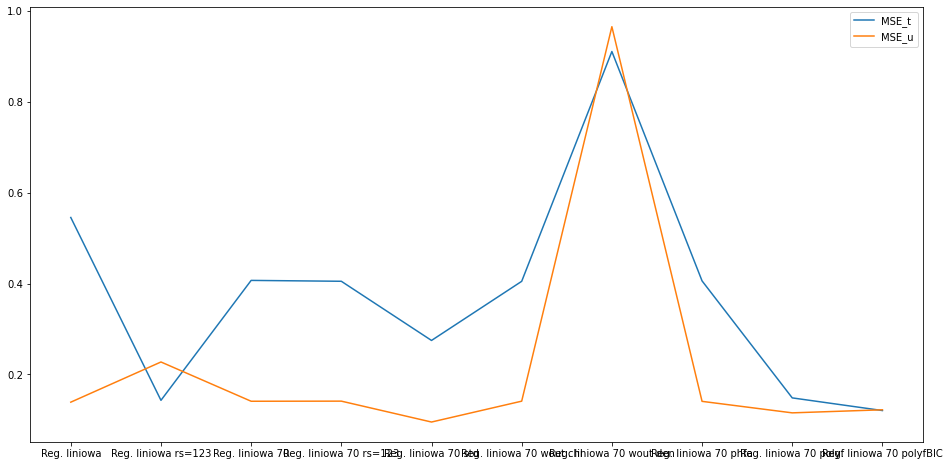

In [97]:
# spróbujmy narysować MSE
plt.figure(figsize=(16,8))
plt.plot(df_results_errors.MSE_t, label='MSE_t')
plt.plot(df_results_errors.MSE_u, label='MSE_u')
plt.legend()
plt.show()
# można to narysować dla każdej metryki i można zdezydować, który model wybrać